In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
print(torch.__version__)

2.5.1


## Data (Preparing and loading)
Data can be anything... in machine learning
* Excel 
* Images
* Text
* Audio
* Videos
* DNA

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representations.


In [3]:
# Create Known parameters using linear regression
weight = 0.7
bias = 0.3

# Create 

start = 0.0
end = 1.0
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [4]:
len(X), len(y) , X[:5] , y[:5]

(50,
 50,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [5]:
 ## splitting the dataset
train_size = int(0.8 * len(X)) 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
# also we can use sklearn for random splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# visualizing the data
def plot_predication(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predication=None):
    """Plot training data, test data and compares predictions"""
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data,train_labels,c="b" ,s=4,label ="Training data")
    
    # plot test data
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

    #Are there predictions to plot?
    if predication is not None:
        plt.scatter(test_data,predication,c="r",s=4,label="Predictions")
        
    plt.legend(prop={"size":14})

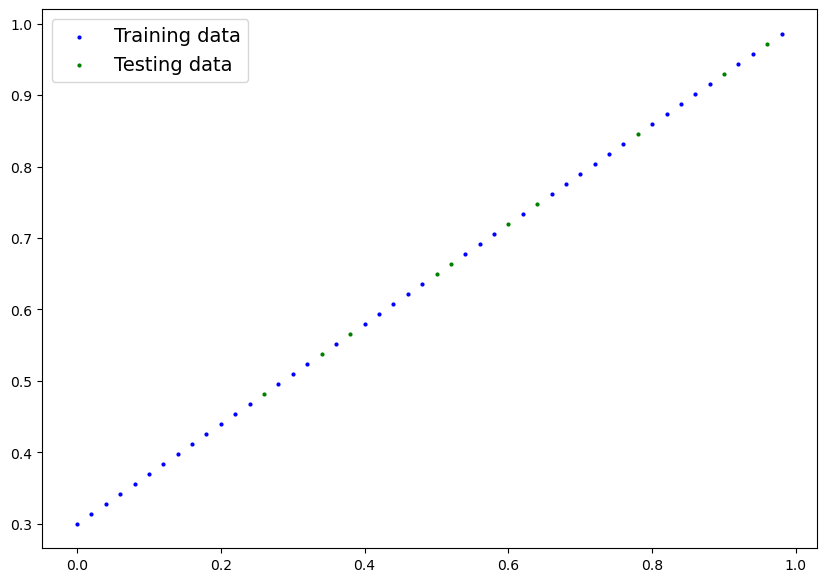

In [12]:
plot_predication()

In [74]:
# Create linear regression model
class LinearRegressionModel(nn.Module):
    # torch.manual_seed(42)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return x * self.weights + self.bias

In [75]:
# Cheate a random seed

torch.manual_seed(42)

#Create an instance of the model
model = LinearRegressionModel()

#check out the model's parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [76]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [77]:
weight , bias

(0.7, 0.3)

In [87]:
# make same predictions
with torch.inference_mode():
    y_pred = model(X_test)
y_pred

tensor([[0.4811],
        [0.8447],
        [0.7189],
        [0.9287],
        [0.5371],
        [0.9706],
        [0.6629],
        [0.6489],
        [0.7468],
        [0.5650]])

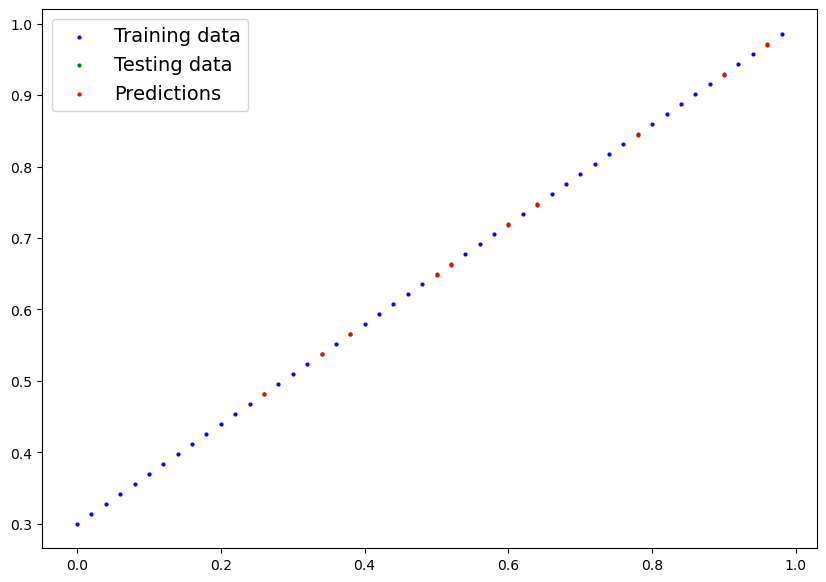

In [88]:
plot_predication(predication=y_pred)

In [ ]:
## train model
# setup loss function
loss_fn = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

In [91]:
# Building a training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(list(model.parameters()))
    # model.eval()

In [92]:
list(model.parameters())

[Parameter containing:
 tensor([0.6993], requires_grad=True),
 Parameter containing:
 tensor([0.2993], requires_grad=True)]